## Import



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import der csv mit den Zählungen von Werning:

In [20]:
# CSV-Datei einlesen aus Git
df = pd.read_csv('https://raw.githubusercontent.com/davimon23/MAHieroglyphenOCR/refs/heads/main/analysis/Werning_D_A-Hieroglyphs_in_TLA_and_PT-20092021-OpenXML(bearbeitet).csv', header=0, delimiter=';')

# Spalten extrahieren und "Name (suggested)" splitten
neue_tabelle = df[['Name (suggested)', 'TLA+PT']].copy()

# Zeilen mit NULL oder leeren Zellen filtern
neue_tabelle = neue_tabelle[neue_tabelle['Name (suggested)'].notna()]
neue_tabelle = neue_tabelle[neue_tabelle['Name (suggested)'] != '']
neue_tabelle = neue_tabelle[~neue_tabelle['Name (suggested)'].str.startswith('DEST')]
neue_tabelle = neue_tabelle[~neue_tabelle['Name (suggested)'].str.startswith('FULL')]
neue_tabelle = neue_tabelle[~neue_tabelle['Name (suggested)'].str.startswith('QUAR')]
neue_tabelle = neue_tabelle[~neue_tabelle['Name (suggested)'].str.startswith('EGY')]

# "Name (suggested)" splitten
neue_tabelle['Name (suggested)'] = neue_tabelle['Name (suggested)'].str.split(' ').str[0]

# Spalten umbenennen
neue_tabelle = neue_tabelle.rename(columns={'Name (suggested)': 'Gardinercode', 'TLA+PT': 'Anzahl'})

# Ergebnis anzeigen
print(neue_tabelle)

     Gardinercode   Anzahl
0            A001  17800.0
1            A002   9550.0
2           A002A     38.0
3            A003      4.0
4           A003A      1.0
...           ...      ...
3362         Z025     10.0
3363         Z030     54.0
3364         Z031      1.0
3365         Z034      1.0
3366         Z037      2.0

[3347 rows x 2 columns]


In [5]:
# Gruppiere nach 'Gardinercode' und summiere 'Anzahl'
grouped_tabelle = neue_tabelle.groupby('Gardinercode')['Anzahl'].sum().reset_index()
grouped_tabelle = grouped_tabelle[grouped_tabelle['Gardinercode'] != 'n.a.']
grouped_tabelle = grouped_tabelle[grouped_tabelle['Gardinercode'] != 'US001O124VARA']

# Ergebnis anzeigen
print(grouped_tabelle)

     Gardinercode   Anzahl
0            A001  17800.0
1            A002   9550.0
2           A002A     38.0
3            A003      4.0
4           A003A      1.0
...           ...      ...
3224         Z025     10.0
3225         Z030     54.0
3226         Z031      1.0
3227         Z034      1.0
3228         Z037      2.0

[3228 rows x 2 columns]


##Häufigkeitsanalyse:

In [6]:
# Sortiere nach 'Anzahl' absteigend und setze den Index zurück
ranked_tabelle = grouped_tabelle.sort_values('Anzahl', ascending=False).reset_index(drop=True)

# Erstelle die Rangspalte basierend auf dem Index
ranked_tabelle['Rang'] = ranked_tabelle.index + 1

# Zeige die Tabelle an
print(ranked_tabelle)

     Gardinercode    Anzahl  Rang
0            X001  136265.0     1
1            N035  119349.0     2
2            M017   87381.0     3
3            D021   75849.0     4
4            Z001   61714.0     5
...           ...       ...   ...
3223        Z015G       0.0  3224
3224        Z015H       0.0  3225
3225        Z016D       0.0  3226
3226        O030A       0.0  3227
3227         Z015       0.0  3228

[3228 rows x 3 columns]


Vergleich mit Häufigkeit nach Zipfschem Gesetz:
https://de.wikipedia.org/wiki/Zipfsches_Gesetz

In [21]:
n = 3228
summe = np.sum(1/np.arange(1, n + 1))

print(f"Die Summe von 1/n für n = 1 bis {n} ist: {summe}")

Die Summe von 1/n für n = 1 bis 3228 ist: 8.656988580965542


In [9]:
# Berechne die Summe aller Anzahlen
summe_anzahl = ranked_tabelle['Anzahl'].sum()
print(summe_anzahl)

# Füge die Spalte "Häufigkeit" hinzu
ranked_tabelle['Häufigkeit'] = ranked_tabelle['Anzahl'] / summe_anzahl

# Füge die Spalte "Zipf-Wahrscheinlichkeit" hinzu (unter Verwendung der vorhandenen summe)
n = 3228
summe = np.sum(1 / np.arange(1, n + 1)**a)
ranked_tabelle['Zipf-Wahrscheinlichkeit'] = 1 / (ranked_tabelle['Rang']**a * summe)

# Zeige die aktualisierte Tabelle an
print(ranked_tabelle)

1734445.0
     Gardinercode    Anzahl  Rang  Häufigkeit  Zipf-Wahrscheinlichkeit
0            X001  136265.0     1    0.078564                 0.217482
1            N035  119349.0     2    0.068811                 0.094665
2            M017   87381.0     3    0.050380                 0.058194
3            D021   75849.0     4    0.043731                 0.041205
4            Z001   61714.0     5    0.035581                 0.031525
...           ...       ...   ...         ...                      ...
3223        Z015G       0.0  3224    0.000000                 0.000013
3224        Z015H       0.0  3225    0.000000                 0.000013
3225        Z016D       0.0  3226    0.000000                 0.000013
3226        O030A       0.0  3227    0.000000                 0.000013
3227         Z015       0.0  3228    0.000000                 0.000013

[3228 rows x 5 columns]


In [ ]:
# Exportiere den DataFrame als CSV-Datei mit Trennzeichen ';'
ranked_tabelle.to_csv('ranked_tabelle.csv', index=False, sep=';')

##Plot

Plot der relativen Häufigkeit und der erwarteten Zipf-Wahrscheinlichkeit:

(array([], dtype=float64), [])

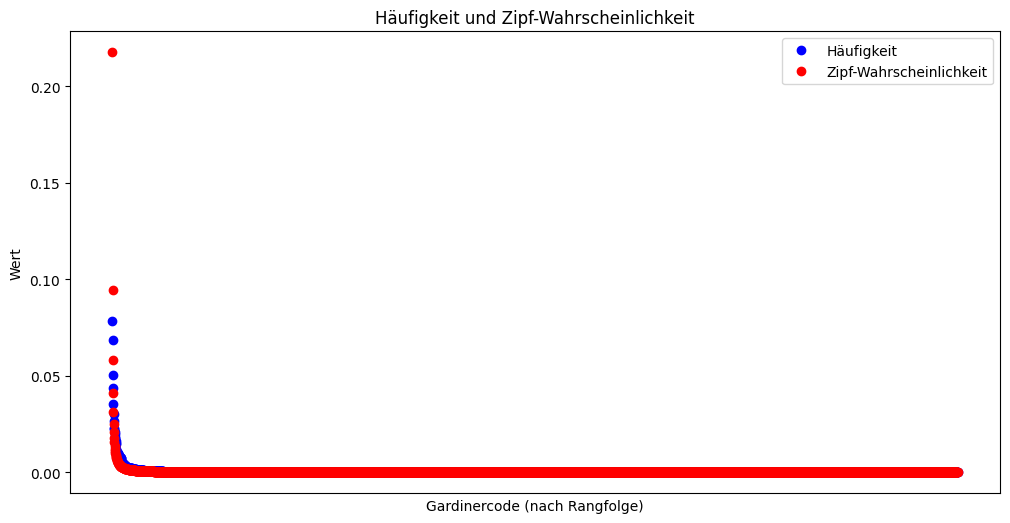

In [10]:
# Gardinercodes nach Rangfolge sortieren
x = ranked_tabelle['Gardinercode'][ranked_tabelle['Rang'].argsort()]

# Häufigkeiten und Zipf-Wahrscheinlichkeiten
y_häufigkeit = ranked_tabelle['Häufigkeit'][ranked_tabelle['Rang'].argsort()]
y_zipf = ranked_tabelle['Zipf-Wahrscheinlichkeit'][ranked_tabelle['Rang'].argsort()]

# Graph erstellen
plt.figure(figsize=(12, 6))  # Optional: Größe des Graphen anpassen

# Graph erstellen (ohne Textausgabe der Punkte)
plt.plot(x, y_häufigkeit, marker='o', linestyle='None', color='blue', label='Häufigkeit')
plt.plot(x, y_zipf, marker='o', linestyle='None', color='red', label='Zipf-Wahrscheinlichkeit')

# x-Ticks ausblenden
plt.xticks([])

plt.xlabel('Gardinercode (nach Rangfolge)')
plt.ylabel('Wert')
plt.title('Häufigkeit und Zipf-Wahrscheinlichkeit')
plt.legend()  # Legende anzeigen
plt.xticks(rotation=90)  # X-Achsenbeschriftungen drehen (optional)

In [11]:
# Filtere die Tabelle nach "Anzahl" >= 10
gefilterte_tabelle = ranked_tabelle[ranked_tabelle['Anzahl'] >= 10]

# Setze den Index der gefilterten Tabelle zurück
gefilterte_tabelle = gefilterte_tabelle.reset_index(drop=True)

# Zeige die gefilterte Tabelle an
#print(gefilterte_tabelle)

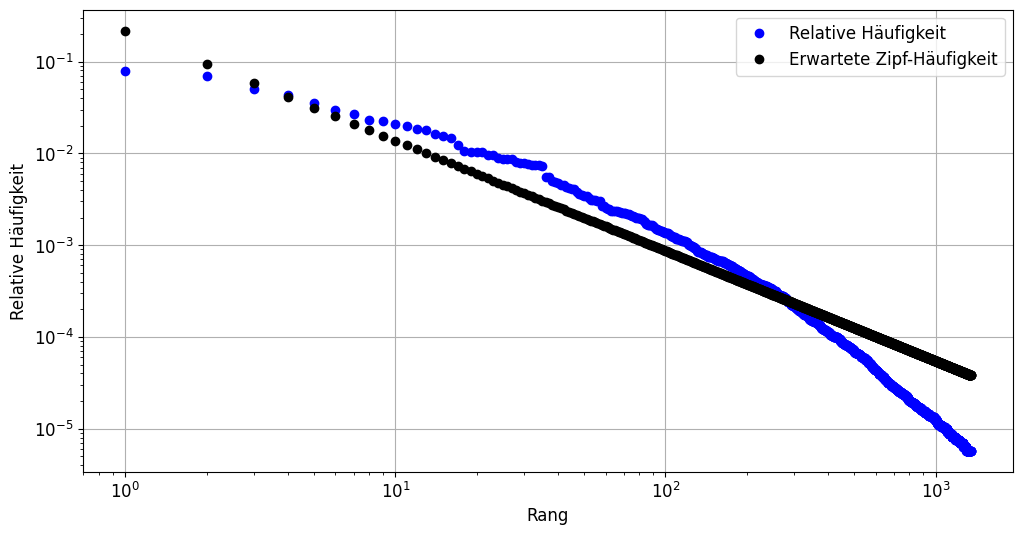

In [14]:
# Deine Daten (x, y_häufigkeit, y_zipf, y_zipf_zeta)
x = gefilterte_tabelle['Rang'][gefilterte_tabelle['Rang'].argsort()]#[:100]
y_häufigkeit = gefilterte_tabelle['Häufigkeit'][gefilterte_tabelle['Rang'].argsort()]#[:100]
y_zipf = gefilterte_tabelle['Zipf-Wahrscheinlichkeit'][gefilterte_tabelle['Rang'].argsort()]#[:100]

# Schriftgröße auf 12 Punkte setzen
plt.rcParams.update({'font.size': 12})

# Doppelt logarithmische Auftragung
plt.figure(figsize=(12, 6))  # Optional: Größe des Graphen anpassen

plt.loglog(x, y_häufigkeit, marker='o', linestyle='None', color='blue', label='Relative Häufigkeit')
plt.loglog(x, y_zipf, marker='o', linestyle='None', color='black', label='Erwartete Zipf-Häufigkeit')

# Beschriftungen und Titel
plt.xlabel('Rang')
plt.ylabel('Relative Häufigkeit')
#plt.title('Doppelt logarithmische Auftragung der Häufigkeiten und Zipf-Wahrscheinlichkeiten')

# X-Achsenbeschriftungen mit Gardinercodes
#plt.xticks(x, x, rotation=90, ha='right', fontsize=6)

# Legende
plt.legend()

# Gitter anzeigen
plt.grid(True)

# Graph anzeigen
plt.show()